In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import sklearn libraries for Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

# Import statsmodels libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Read Leads.csv file using pandas
df = pd.read_csv('Leads.csv')

In [5]:
# See head of the df

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# See the shape
df.shape

(9240, 37)

In [7]:
# See the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# See the details
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Dropping unwanted columns
#  - Prospect ID as it unique id for every client 
#  - Lead Number as it's a lead number assigned to each lead procured.

df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [10]:
# Replacing 'Select' with NaN (It means no option is selected)
df = df.replace('Select', np.nan)

In [11]:
# Check for null values
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
# Get 33% of the dataframe size (row count)

df_len = df.shape[0]
df_len_expected = df_len * 0.33
df_len_expected

3049.2000000000003

In [13]:
# Droping all the columns if it has more than 33% null values 
for col in df.columns:
    if df[col].isnull().sum() > df_len_expected:
        df.drop(col, axis = 1, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [15]:
# Check null values
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [16]:
# Drop the ad communication channel.
df.drop(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations'], axis = 1, inplace = True)

In [17]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Receive More Updates About Our Courses              1
Update me on Supply Chain Content                   1
Get updates on DM Content                           1
I agree to pay the amount through cheque            1
A free copy of Mastering The Interview              2
Last Notable Activity                              16
dtype: int64

In [18]:
# Droping all the column if it contains only one unique value
for col in df.columns:
    if df[col].nunique() == 1:
        df.drop(col, axis = 1, inplace = True)

In [19]:
# Inspect the value counts of "Country" column
df['Country'].value_counts( dropna = False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [20]:
# Other than India, most of the values in the country coumn is empty. Hence dropping the 'Country' column
df.drop(['Country'], axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   What is your current occupation                6550 

In [22]:
# Check null values
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
What is your current occupation                  2690
What matters most to you in choosing a course    2709
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [23]:
# Drop the rows where the column 'Lead Source' is null
df = df[~pd.isnull(df['Lead Source'])]

In [24]:
# Drop the rows where the column 'TotalVisits' is null
df = df[~pd.isnull(df['TotalVisits'])]

In [25]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64

In [26]:
# Drop column 'What matters most to you in choosing a course'
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [27]:
# See the occupation values
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: count, dtype: int64

In [28]:
# If null, fill with 'Not Provided'
df['What is your current occupation'] = df['What is your current occupation'].fillna('Not provided')

In [29]:
# Rename the column to 'Current occupation'
df.rename(columns={'What is your current occupation':'Current occupation'}, inplace=True)

In [30]:
df.shape

(9074, 12)

In [31]:
# Check null values
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Current occupation                        0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [32]:
df['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64

In [33]:
for col in df.columns:
    print("Value counts for:", col)
    print(df[col].value_counts())
    print('------------------------')

Value counts for: Lead Origin
Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
------------------------
Value counts for: Lead Source
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
------------------------
Value counts for: Do Not Email
Do Not Email
No     8358
Yes     716
Name: count, dtype: int64
------------------------
Value counts for: Do 

In [34]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


In [35]:
# A function to show box and dist plot

def show_box_dist_plot(col):  
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(df[col])
    plt.subplot(1, 2, 2)
    sns.distplot(df[col])
    plt.show()

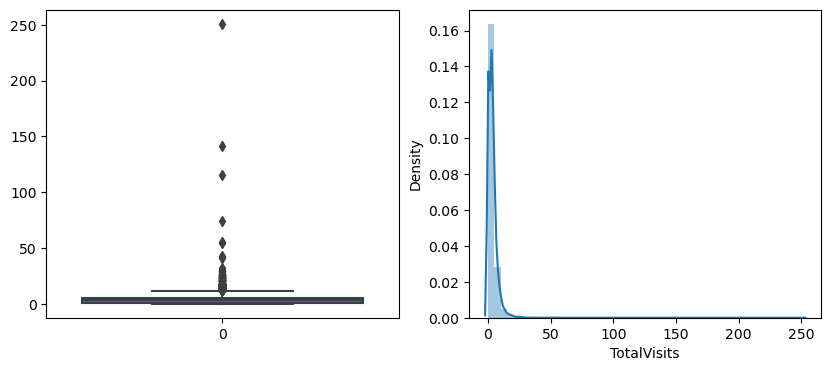

In [36]:
show_box_dist_plot('TotalVisits')

In [37]:
df = df[~(df['TotalVisits'] > 10)]

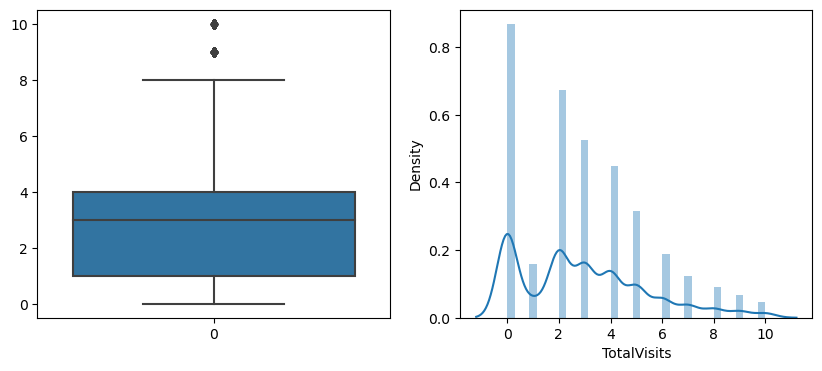

In [38]:
show_box_dist_plot('TotalVisits')

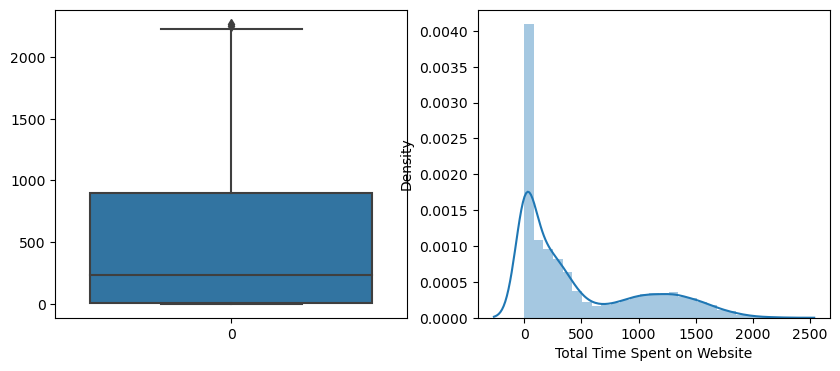

In [39]:
show_box_dist_plot('Total Time Spent on Website')

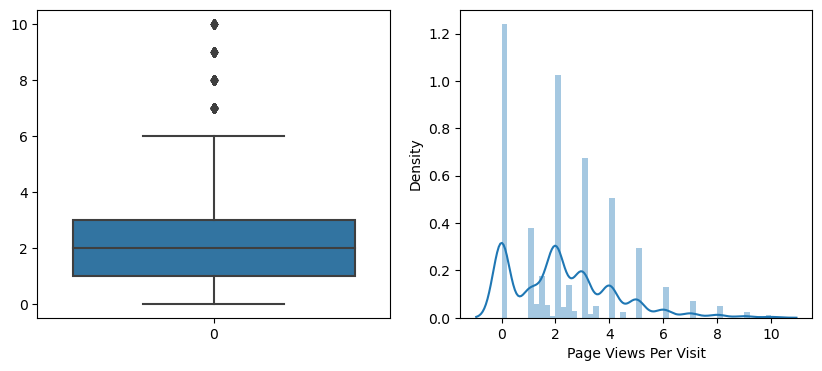

In [40]:
show_box_dist_plot('Page Views Per Visit')

In [41]:
# Removing outliers
df = df[~(df['Page Views Per Visit'] > 8)]

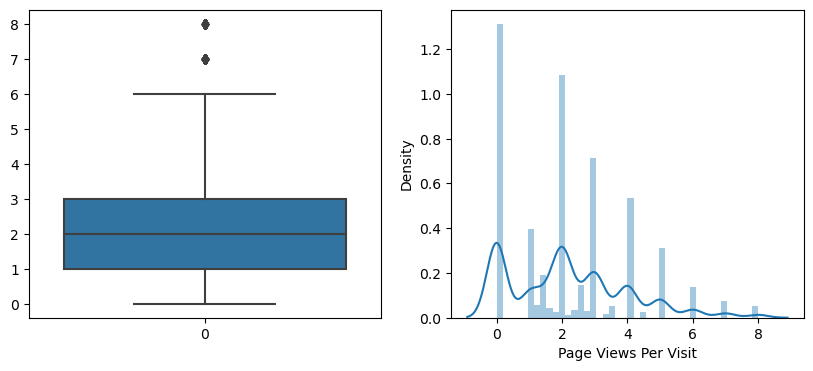

In [42]:
show_box_dist_plot('Page Views Per Visit')

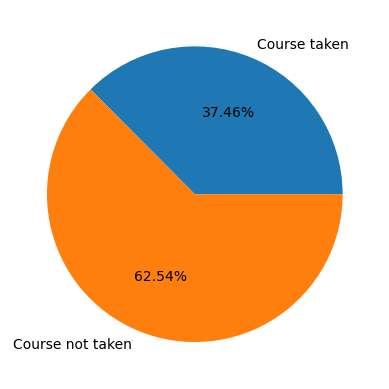

In [43]:
# Pie chart for converted column
x = ['Course taken','Course not taken']
y = [len(df[df['Converted'] == 1]), len(df[df['Converted'] == 0])]
plt.pie(y, data = df['Converted'], labels = x, autopct='%1.2f%%')
plt.show()

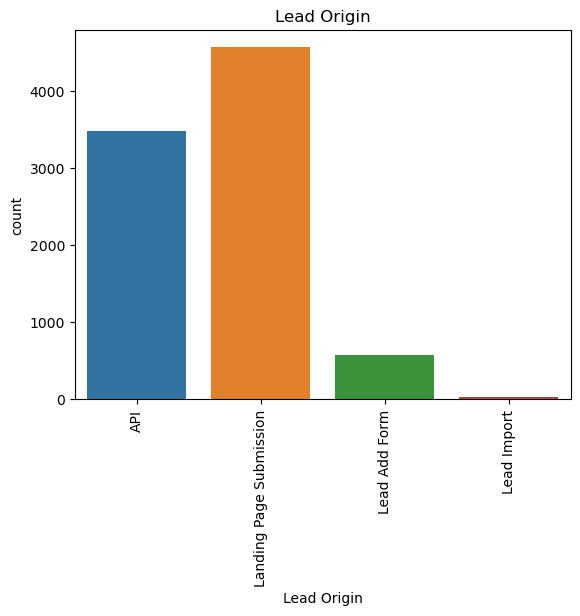

In [44]:
# Plotting lead origin
sns.countplot(x = 'Lead Origin',data = df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')
plt.show()

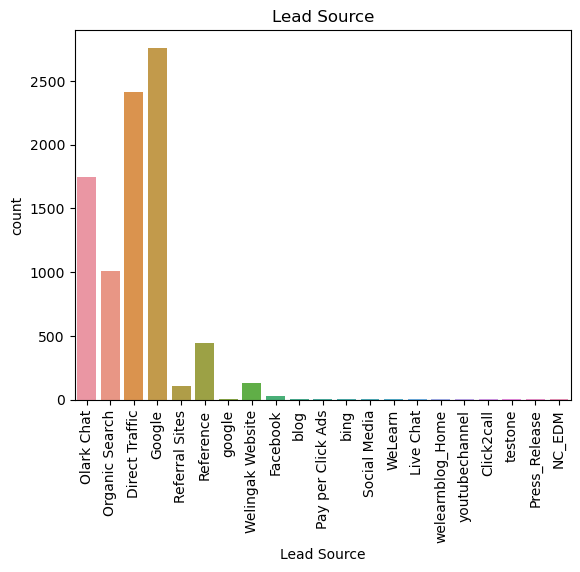

In [45]:
# Plotting Lead Source
sns.countplot(x = 'Lead Source',data = df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

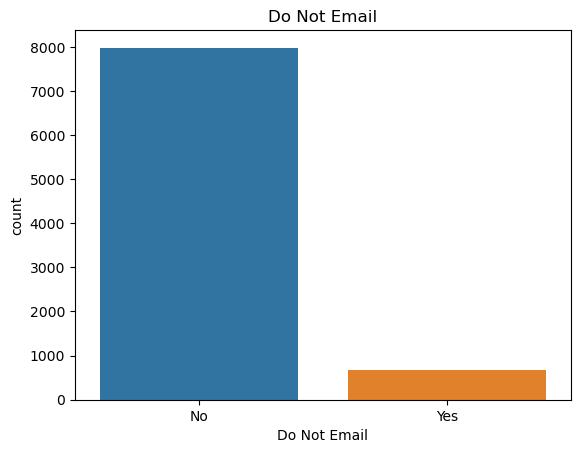

In [46]:
# Plotting Do Not Email
sns.countplot(x = 'Do Not Email', data = df)
plt.title('Do Not Email')
plt.show()

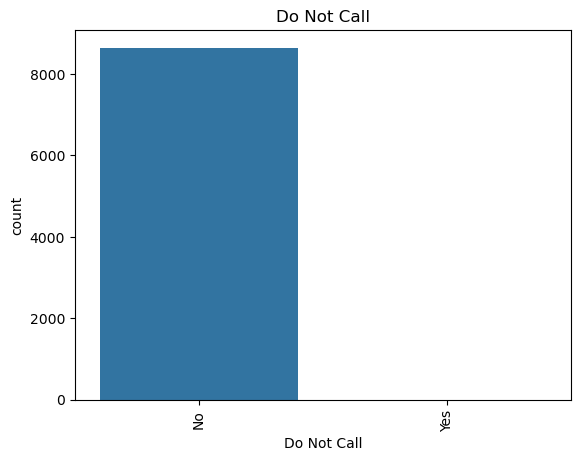

In [47]:
# Plotting Do Not Call
sns.countplot(x = 'Do Not Call', data = df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

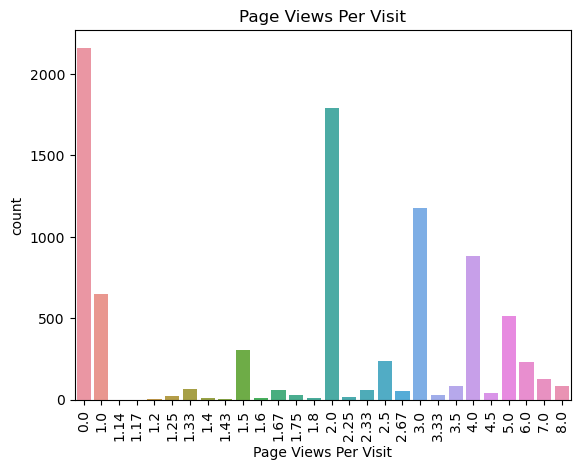

In [48]:
# Plotting Page Views Per Visit
sns.countplot(x = 'Page Views Per Visit', data = df).tick_params(axis='x', rotation = 90)
plt.title('Page Views Per Visit')
plt.show()

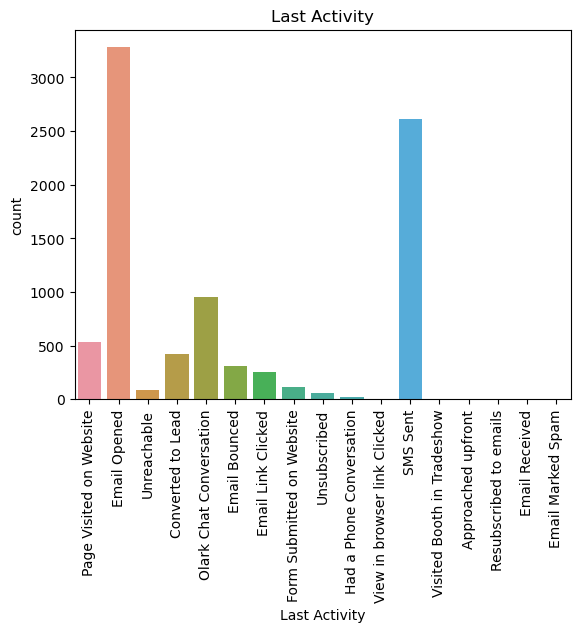

In [49]:
# Plotting Last Activity
sns.countplot(x = 'Last Activity', data = df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

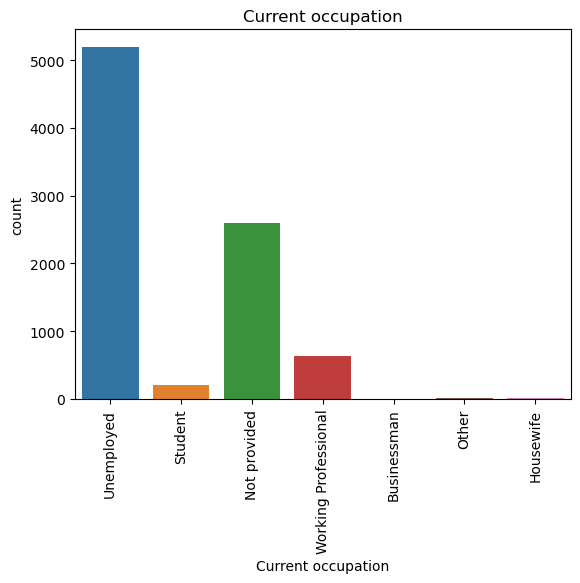

In [50]:
# Plotting Page Current occupation
sns.countplot(x = 'Current occupation', data = df).tick_params(axis='x', rotation = 90)
plt.title('Current occupation')
plt.show()

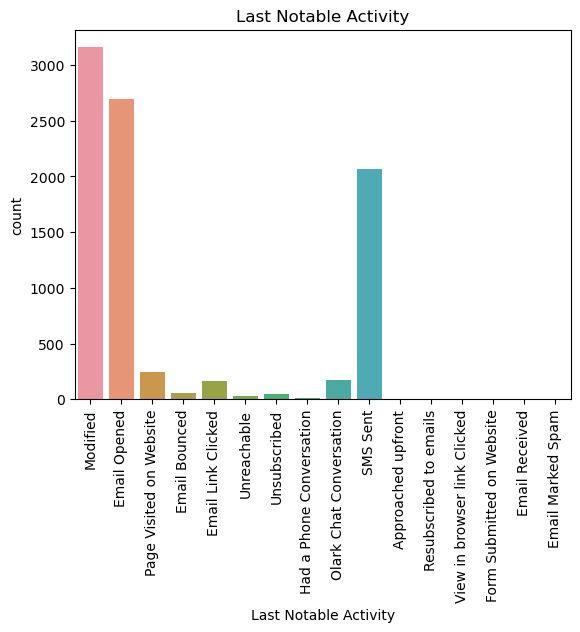

In [51]:
# Plotting Page Current occupation
sns.countplot(x = 'Last Notable Activity', data = df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8653 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8653 non-null   object 
 1   Lead Source                             8653 non-null   object 
 2   Do Not Email                            8653 non-null   object 
 3   Do Not Call                             8653 non-null   object 
 4   Converted                               8653 non-null   int64  
 5   TotalVisits                             8653 non-null   float64
 6   Total Time Spent on Website             8653 non-null   int64  
 7   Page Views Per Visit                    8653 non-null   float64
 8   Last Activity                           8653 non-null   object 
 9   Current occupation                      8653 non-null   object 
 10  A free copy of Mastering The Interview  8653 non-null   object 
 

In [53]:
# Finding corelation based on below columns
corrColumns = ['Converted', 
             'TotalVisits',
             'Total Time Spent on Website',
             'Page Views Per Visit']
dfCorr = df[corrColumns]

In [54]:
dfCorr.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.036930,0.348673,-0.003919
TotalVisits,0.036930,1.000000,0.376683,0.789421
Total Time Spent on Website,0.348673,0.376683,1.000000,0.358457
Page Views Per Visit,-0.003919,0.789421,0.358457,1.000000


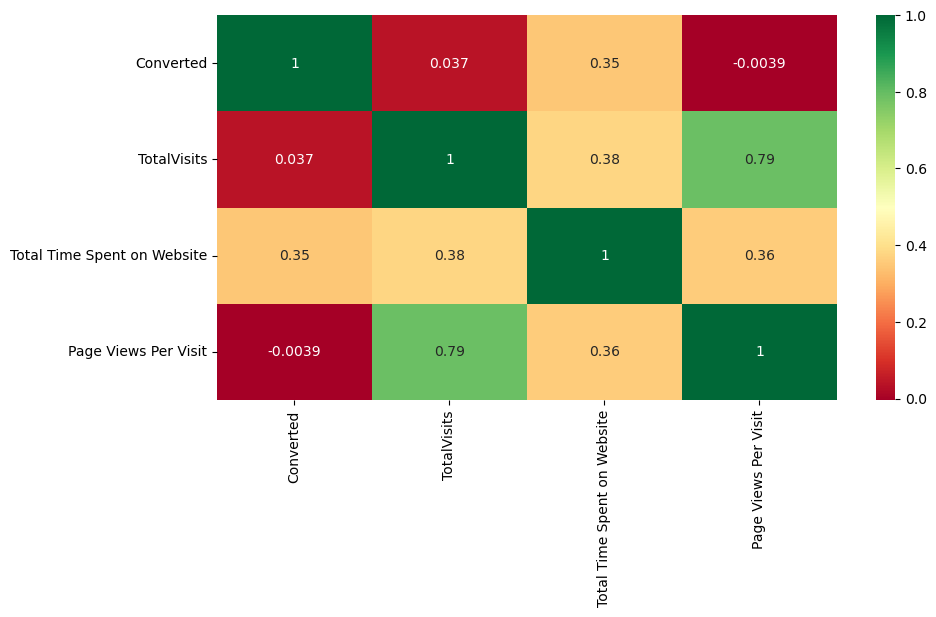

In [55]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(dfCorr.corr(), cmap="RdYlGn", annot = True)
plt.show()

In [56]:
# Get dummies
dummy_data = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 
                                    'Current occupation', 'Last Notable Activity', 'A free copy of Mastering The Interview']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
0,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,True,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [57]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([df, dummy_data], axis=1)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Current occupation,...,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,False,True,False,False,False,False,False,False,False,False
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,...,False,False,False,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,...,False,False,False,False,False,False,False,False,False,True
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,...,False,True,False,False,False,False,False,False,False,False
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,False,True,False,False,False,False,False,False,False,False


In [58]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 
                                    'Current occupation', 'Last Notable Activity', 'A free copy of Mastering The Interview'], axis = 1)

In [59]:
lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,1.0,305,1.0,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1,2.0,1428,1.0,True,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [60]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8653 entries, 0 to 9239
Data columns (total 67 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Converted                                           8653 non-null   int64  
 1   TotalVisits                                         8653 non-null   float64
 2   Total Time Spent on Website                         8653 non-null   int64  
 3   Page Views Per Visit                                8653 non-null   float64
 4   Lead Origin_Landing Page Submission                 8653 non-null   bool   
 5   Lead Origin_Lead Add Form                           8653 non-null   bool   
 6   Lead Origin_Lead Import                             8653 non-null   bool   
 7   Lead Source_Direct Traffic                          8653 non-null   bool   
 8   Lead Source_Facebook                                8653 non-null   bool   
 9   Le

In [61]:
# Model Building

In [62]:
# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1.0,305,1.0,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [63]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [64]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [65]:
X_train.shape

(6057, 66)

In [66]:
y_train.shape

(6057,)

In [67]:
X_test.shape

(2596, 66)

In [68]:
y_test.shape

(2596,)

In [69]:
# Using scaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
4556,0.047609,1.461213,0.436889,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2586,-1.191792,-0.873461,-1.210458,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8038,1.287010,0.451972,-0.386784,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
5821,-0.365525,-0.549916,-0.112226,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
5499,2.526412,1.499818,0.436889,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [70]:
# Checking the Lead Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.455217843522476

In [71]:
# Selecting feature using RFE
logi_reg = LogisticRegression()

rfe = RFE(logi_reg, step = 20)
rfe = rfe.fit(X_train, y_train)

In [72]:
rfe.support_

array([False,  True, False, False,  True, False,  True, False,  True,
       False,  True,  True,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True, False,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False])

In [73]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'Current occupation_Not provided', 'Current occupation_Other',
       'Current occupation_Student', 'Current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity

In [74]:
# Model 1
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train, X_train_sm.astype(float), family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6024
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2383.6
Date:                Tue, 17 Sep 2024   Deviance:                       4767.2
Time:                        20:40:44   Pearson chi2:                 5.86e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4154
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.1595      0.340      0.470      0.639      -0.506       0.825
Total Time Spent on Website                        1.1097      0.042     26.335      0.000       1.027       1.192
Lead Origin_Lead Add Form                          2.0450      1.285      1.591      0.112      -0.474       4.564
Lead Source_Direct Traffic                        -0.5288      0.297     -1.778      0.075      -1.112       0.054
Lead Source_Google                                -0.1363      0.295     -0.462      0.644      -0.715       0.442
Lead Source_NC_EDM                                22.6238   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Olark Chat                             0.9899      0.302      3.275      0.001       0.398       1.582
Lead Source_Organic Search                        -0.3558      0.307     -1.158      0.247      -0.958       0.246
Lead Source_Reference                              1.5810      1.306      1.211      0.226      -0.978       4.140
Lead Source_Welingak Website                       2.9605      1.471      2.012      0.044       0.077       5.844
Do Not Email_Yes                                  -1.3486      0.203     -6.650      0.000      -1.746      -0.951
Last Activity_Converted to Lead                   -1.0528      0.242     -4.343      0.000      -1.528      -0.578
Last Activity_Email Bounced                       -1.0793      0.482     -2.241      0.025      -2.023      -0.135
Last Activity_Email Link Clicked                  -0.9358      0.265     -3.533      0.000      -1.455      -0.417
Last Activity_Form Submitted on Website           -0.9083      0.362     -2.506      0.012      -1.619      -0.198
Last Activity_Had a Phone Conversation             0.9487      0.958      0.991      0.322      -0.929       2.826
Last Activity_Olark Chat Conversation             -1.3374      0.216     -6.196      0.000      -1.760      -0.914
Last Activity_Page Visited on Website             -0.6302      0.248     -2.540      0.011      -1.116      -0.144
Last Activity_Resubscribed to emails              11.3552   1.46e+04      0.001      0.999   -2.86e+04    2.87e+04
Last Activity_SMS Sent                             0.5179      0.174      2.973      0.003       0.176       0.859
Last Activity_Unreachable                         -0.7961      0.510     -1.562      0.118      -1.795       0.203
Last Activity_View in browser link Clicked       -21.0512   1.61e+04     -0.001      0.999   -3.17e+04    3.16e+04
Current occupation_Not provided                   -1.3244      0.094    -14.158      0.000      -1.508      -1.141
Current occupation_Other                           1.2072      0.778      1.552      0.121   

In [75]:
# Dropping the column which has high P values
# -- 'Lead Source_NC_EDM', 
# -- 'Last Activity_Resubscribed to emails', 
# -- 'Last Notable Activity_Resubscribed to emails'
col1 = cols.drop(['Lead Source_NC_EDM', 
                  'Last Activity_Resubscribed to emails', 
                  'Last Notable Activity_Resubscribed to emails'])

In [76]:
# Model 2
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6026
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2386.3
Date:                Tue, 17 Sep 2024   Deviance:                       4772.7
Time:                        20:40:44   Pearson chi2:                 5.87e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4149
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.2410      0.335      0.720      0.471      -0.415       0.897
Total Time Spent on Website                        1.1103      0.042     26.350      0.000       1.028       1.193
Lead Origin_Lead Add Form                          2.0109      1.285      1.564      0.118      -0.509       4.530
Lead Source_Direct Traffic                        -0.5884      0.292     -2.015      0.044      -1.161      -0.016
Lead Source_Google                                -0.1960      0.290     -0.676      0.499      -0.764       0.372
Lead Source_Olark Chat                             0.9349      0.297      3.150      0.002       0.353       1.517
Lead Source_Organic Search                        -0.4152      0.302     -1.375      0.169      -1.007       0.177
Lead Source_Reference                              1.5585      1.306      1.193      0.233      -1.002       4.119
Lead Source_Welingak Website                       2.9408      1.472      1.998      0.046       0.056       5.826
Do Not Email_Yes                                  -1.3523      0.203     -6.669      0.000      -1.750      -0.955
Last Activity_Converted to Lead                   -1.0617      0.242     -4.383      0.000      -1.536      -0.587
Last Activity_Email Bounced                       -1.0853      0.482     -2.254      0.024      -2.029      -0.142
Last Activity_Email Link Clicked                  -0.9586      0.264     -3.625      0.000      -1.477      -0.440
Last Activity_Form Submitted on Website           -0.9160      0.362     -2.529      0.011      -1.626      -0.206
Last Activity_Had a Phone Conversation             0.9370      0.959      0.977      0.329      -0.943       2.817
Last Activity_Olark Chat Conversation             -1.3497      0.216     -6.262      0.000      -1.772      -0.927
Last Activity_Page Visited on Website             -0.6392      0.248     -2.579      0.010      -1.125      -0.153
Last Activity_SMS Sent                             0.4962      0.174      2.859      0.004       0.156       0.836
Last Activity_Unreachable                         -0.8055      0.509     -1.581      0.114      -1.804       0.193
Last Activity_View in browser link Clicked       -21.0610   1.61e+04     -0.001      0.999   -3.17e+04    3.16e+04
Current occupation_Not provided                   -1.3143      0.093    -14.091      0.000      -1.497      -1.131
Current occupation_Other                           1.2103      0.778      1.556      0.120      -0.314       2.734
Current occupation_Student                        -0.0868      0.232     -0.375      0.708      -0.541       0.367
Current occupation_Working Professional            2.3737      0.189     12.573      0.000   

In [77]:
# Dropping the column which has high P values
# -- 'Last Activity_View in browser link Clicked', 
col2 = col1.drop(['Last Activity_View in browser link Clicked'])

In [78]:
# Model 3
X_train_sm = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train, X_train_sm.astype(float), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6027
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2387.7
Date:                Tue, 17 Sep 2024   Deviance:                       4775.5
Time:                        20:40:44   Pearson chi2:                 5.87e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4146
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.2224      0.334      0.665      0.506      -0.433       0.878
Total Time Spent on Website                        1.1122      0.042     26.398      0.000       1.030       1.195
Lead Origin_Lead Add Form                          2.0170      1.286      1.568      0.117      -0.504       4.538
Lead Source_Direct Traffic                        -0.5922      0.292     -2.028      0.043      -1.164      -0.020
Lead Source_Google                                -0.1991      0.290     -0.687      0.492      -0.767       0.369
Lead Source_Olark Chat                             0.9363      0.297      3.154      0.002       0.355       1.518
Lead Source_Organic Search                        -0.4168      0.302     -1.380      0.167      -1.009       0.175
Lead Source_Reference                              1.5545      1.307      1.189      0.234      -1.007       4.116
Lead Source_Welingak Website                       2.9340      1.473      1.992      0.046       0.047       5.821
Do Not Email_Yes                                  -1.3486      0.203     -6.652      0.000      -1.746      -0.951
Last Activity_Converted to Lead                   -1.0439      0.242     -4.315      0.000      -1.518      -0.570
Last Activity_Email Bounced                       -1.0712      0.481     -2.226      0.026      -2.014      -0.128
Last Activity_Email Link Clicked                  -0.9396      0.264     -3.558      0.000      -1.457      -0.422
Last Activity_Form Submitted on Website           -0.8995      0.362     -2.484      0.013      -1.609      -0.190
Last Activity_Had a Phone Conversation             0.9528      0.959      0.993      0.321      -0.927       2.833
Last Activity_Olark Chat Conversation             -1.3349      0.215     -6.197      0.000      -1.757      -0.913
Last Activity_Page Visited on Website             -0.6237      0.248     -2.518      0.012      -1.109      -0.138
Last Activity_SMS Sent                             0.5160      0.173      2.983      0.003       0.177       0.855
Last Activity_Unreachable                         -0.7901      0.509     -1.551      0.121      -1.789       0.209
Current occupation_Not provided                   -1.3139      0.093    -14.084      0.000      -1.497      -1.131
Current occupation_Other                           1.2087      0.778      1.554      0.120      -0.316       2.733
Current occupation_Student                        -0.0865      0.232     -0.373      0.709      -0.541       0.368
Current occupation_Working Professional            2.3565      0.187     12.586      0.000       1.990       2.723
Last Notable Activity_Email Bounced                0.6471      0.648      0.999      0.318   

In [79]:
# Dropping the column which has high P values
# -- 'Current occupation_Student'
# -- 'Lead Source_Google'
# -- 'Last Activity_Had a Phone Conversation'
col3 = col2.drop(['Current occupation_Student',
                  'Lead Source_Google',
                  'Last Activity_Had a Phone Conversation',
                  'Last Notable Activity_Email Bounced'
                 ])

In [80]:
# Model 4
X_train_sm = sm.add_constant(X_train[col3])
logm4 = sm.GLM(y_train, X_train_sm.astype(float), family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6031
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2389.1
Date:                Tue, 17 Sep 2024   Deviance:                       4778.2
Time:                        20:40:44   Pearson chi2:                 5.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4144
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.0749      0.188      0.399      0.690      -0.293       0.443
Total Time Spent on Website                        1.1111      0.042     26.437      0.000       1.029       1.193
Lead Origin_Lead Add Form                          2.1167      1.274      1.662      0.097      -0.380       4.613
Lead Source_Direct Traffic                        -0.4038      0.092     -4.400      0.000      -0.584      -0.224
Lead Source_Olark Chat                             1.1213      0.116      9.654      0.000       0.894       1.349
Lead Source_Organic Search                        -0.2230      0.119     -1.868      0.062      -0.457       0.011
Lead Source_Reference                              1.6398      1.297      1.265      0.206      -0.902       4.181
Lead Source_Welingak Website                       3.0412      1.464      2.077      0.038       0.172       5.910
Do Not Email_Yes                                  -1.3372      0.202     -6.630      0.000      -1.733      -0.942
Last Activity_Converted to Lead                   -1.0594      0.241     -4.396      0.000      -1.532      -0.587
Last Activity_Email Bounced                       -0.8208      0.371     -2.213      0.027      -1.548      -0.094
Last Activity_Email Link Clicked                  -0.9746      0.263     -3.704      0.000      -1.490      -0.459
Last Activity_Form Submitted on Website           -0.9174      0.361     -2.538      0.011      -1.626      -0.209
Last Activity_Olark Chat Conversation             -1.3508      0.215     -6.296      0.000      -1.771      -0.930
Last Activity_Page Visited on Website             -0.6393      0.247     -2.587      0.010      -1.124      -0.155
Last Activity_SMS Sent                             0.4752      0.171      2.783      0.005       0.141       0.810
Last Activity_Unreachable                         -0.7995      0.509     -1.569      0.117      -1.798       0.199
Current occupation_Not provided                   -1.3095      0.093    -14.097      0.000      -1.492      -1.127
Current occupation_Other                           1.2119      0.777      1.559      0.119      -0.312       2.736
Current occupation_Working Professional            2.3604      0.187     12.626      0.000       1.994       2.727
Last Notable Activity_Email Opened                -0.8704      0.190     -4.587      0.000      -1.242      -0.498
Last Notable Activity_Had a Phone Conversation     2.1222      1.168      1.817      0.069      -0.167       4.411
Last Notable Activity_Modified                    -0.9761      0.140     -6.983      0.000      -1.250      -0.702
Last Notable Activity_Olark Chat Conversation     -0.6953      0.394     -1.764      0.078   

In [81]:
# Dropping the column which has high P values
# -- 'Lead Source_Reference'
# -- 'Last Activity_Unreachable'
# -- 'Current occupation_Other'
# -- 'Last Notable Activity_Page Visited on Website'
col4 = col3.drop(['Lead Source_Reference',
                  'Last Activity_Unreachable',
                  'Current occupation_Other',
                  'Last Notable Activity_Page Visited on Website'
                 ])

In [82]:
# Model 5
X_train_sm = sm.add_constant(X_train[col4])
logm5 = sm.GLM(y_train, X_train_sm.astype(float), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6035
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2394.0
Date:                Tue, 17 Sep 2024   Deviance:                       4788.0
Time:                        20:40:44   Pearson chi2:                 5.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4134
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.0847      0.177     -0.478      0.632      -0.432       0.262
Total Time Spent on Website                        1.1153      0.042     26.537      0.000       1.033       1.198
Lead Origin_Lead Add Form                          3.7172      0.260     14.320      0.000       3.208       4.226
Lead Source_Direct Traffic                        -0.3944      0.092     -4.307      0.000      -0.574      -0.215
Lead Source_Olark Chat                             1.1357      0.116      9.792      0.000       0.908       1.363
Lead Source_Organic Search                        -0.2169      0.119     -1.820      0.069      -0.450       0.017
Lead Source_Welingak Website                       1.4340      0.764      1.877      0.061      -0.063       2.931
Do Not Email_Yes                                  -1.3102      0.201     -6.531      0.000      -1.703      -0.917
Last Activity_Converted to Lead                   -1.0068      0.239     -4.213      0.000      -1.475      -0.538
Last Activity_Email Bounced                       -0.7530      0.369     -2.042      0.041      -1.476      -0.030
Last Activity_Email Link Clicked                  -0.8469      0.258     -3.282      0.001      -1.353      -0.341
Last Activity_Form Submitted on Website           -0.8640      0.360     -2.399      0.016      -1.570      -0.158
Last Activity_Olark Chat Conversation             -1.2913      0.212     -6.082      0.000      -1.707      -0.875
Last Activity_Page Visited on Website             -0.8012      0.204     -3.929      0.000      -1.201      -0.402
Last Activity_SMS Sent                             0.6096      0.163      3.750      0.000       0.291       0.928
Current occupation_Not provided                   -1.3185      0.093    -14.234      0.000      -1.500      -1.137
Current occupation_Working Professional            2.3602      0.187     12.641      0.000       1.994       2.726
Last Notable Activity_Email Opened                -0.7126      0.179     -3.972      0.000      -1.064      -0.361
Last Notable Activity_Had a Phone Conversation     2.2857      1.167      1.959      0.050      -0.002       4.573
Last Notable Activity_Modified                    -0.8748      0.127     -6.886      0.000      -1.124      -0.626
Last Notable Activity_Olark Chat Conversation     -0.6029      0.390     -1.546      0.122      -1.367       0.161
Last Notable Activity_Unreachable                  0.4889      0.594      0.823      0.411      -0.676       1.653
==================================================================================================================
"""

In [83]:
# Dropping the column which has high P values
# -- 'Last Notable Activity_Unreachable'
# -- 'Last Activity_Unreachable'
# -- 'Current occupation_Other'
# -- 'Last Notable Activity_Page Visited on Website'
col5 = col4.drop(['Last Notable Activity_Unreachable',
                  'Last Notable Activity_Olark Chat Conversation',
                  'Lead Source_Organic Search',
                  'Lead Source_Welingak Website',
                  'Last Notable Activity_Had a Phone Conversation'
                 ])

In [84]:
# Model 6
X_train_sm = sm.add_constant(X_train[col5])
logm6 = sm.GLM(y_train, X_train_sm.astype(float), family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6040
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2402.6
Date:                Tue, 17 Sep 2024   Deviance:                       4805.1
Time:                        20:40:44   Pearson chi2:                 5.91e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4117
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0954      0.160     -0.596      0.551      -0.409       0.218
Total Time Spent on Website                 1.1110      0.042     26.542      0.000       1.029       1.193
Lead Origin_Lead Add Form                   4.0138      0.244     16.456      0.000       3.536       4.492
Lead Source_Direct Traffic                 -0.3466      0.086     -4.028      0.000      -0.515      -0.178
Lead Source_Olark Chat                      1.1785      0.112     10.533      0.000       0.959       1.398
Do Not Email_Yes                           -1.3065      0.198     -6.602      0.000      -1.694      -0.919
Last Activity_Converted to Lead            -1.0713      0.237     -4.527      0.000      -1.535      -0.608
Last Activity_Email Bounced                -0.7952      0.363     -2.191      0.028      -1.507      -0.084
Last Activity_Email Link Clicked           -0.8903      0.252     -3.537      0.000      -1.384      -0.397
Last Activity_Form Submitted on Website    -0.9089      0.360     -2.526      0.012      -1.614      -0.204
Last Activity_Olark Chat Conversation      -1.4847      0.196     -7.588      0.000      -1.868      -1.101
Last Activity_Page Visited on Website      -0.8422      0.198     -4.252      0.000      -1.230      -0.454
Last Activity_SMS Sent                      0.5643      0.151      3.734      0.000       0.268       0.860
Current occupation_Not provided            -1.3167      0.092    -14.273      0.000      -1.497      -1.136
Current occupation_Working Professional     2.3564      0.187     12.598      0.000       1.990       2.723
Last Notable Activity_Email Opened         -0.7520      0.165     -4.546      0.000      -1.076      -0.428
Last Notable Activity_Modified             -0.8586      0.115     -7.441      0.000      -1.085      -0.632
===========================================================================================================
"""

In [85]:
# Validating for VIF values:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].astype(float).values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Modified,2.30
6,Last Activity_Email Bounced,1.95
3,Lead Source_Olark Chat,1.93
4,Do Not Email_Yes,1.90
9,Last Activity_Olark Chat Conversation,1.83
12,Current occupation_Not provided,1.63
2,Lead Source_Direct Traffic,1.58
11,Last Activity_SMS Sent,1.55
14,Last Notable Activity_Email Opened,1.52
1,Lead Origin_Lead Add Form,1.31


In [86]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
# -- 'Last Notable Activity_Unreachable'
# -- 'Last Activity_Unreachable'
# -- 'Current occupation_Other'
# -- 'Last Notable Activity_Page Visited on Website'
col6 = col5.drop(['Last Activity_Email Bounced',
                  'Last Activity_Form Submitted on Website',
                  'Current occupation_Not provided'
                 ])

In [87]:
# Model 7
X_train_sm = sm.add_constant(X_train[col6])
logm7 = sm.GLM(y_train, X_train_sm.astype(float), family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6043
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2521.4
Date:                Tue, 17 Sep 2024   Deviance:                       5042.8
Time:                        20:40:44   Pearson chi2:                 6.26e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3882
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.4752      0.148     -3.203      0.001      -0.766      -0.184
Total Time Spent on Website                 1.1142      0.041     27.329      0.000       1.034       1.194
Lead Origin_Lead Add Form                   4.3776      0.244     17.955      0.000       3.900       4.856
Lead Source_Direct Traffic                 -0.2977      0.084     -3.530      0.000      -0.463      -0.132
Lead Source_Olark Chat                      1.0428      0.108      9.666      0.000       0.831       1.254
Do Not Email_Yes                           -1.4937      0.173     -8.653      0.000      -1.832      -1.155
Last Activity_Converted to Lead            -0.8811      0.229     -3.852      0.000      -1.329      -0.433
Last Activity_Email Link Clicked           -0.8914      0.242     -3.683      0.000      -1.366      -0.417
Last Activity_Olark Chat Conversation      -1.4873      0.187     -7.941      0.000      -1.854      -1.120
Last Activity_Page Visited on Website      -0.7225      0.189     -3.820      0.000      -1.093      -0.352
Last Activity_SMS Sent                      0.6874      0.138      4.976      0.000       0.417       0.958
Current occupation_Working Professional     2.6676      0.186     14.324      0.000       2.303       3.033
Last Notable Activity_Email Opened         -0.6914      0.154     -4.487      0.000      -0.993      -0.389
Last Notable Activity_Modified             -1.0041      0.110     -9.113      0.000      -1.220      -0.788
===========================================================================================================
"""

In [88]:
# Validating for VIF values:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].astype(float).values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,1.96
3,Lead Source_Olark Chat,1.90
7,Last Activity_Olark Chat Conversation,1.69
2,Lead Source_Direct Traffic,1.57
9,Last Activity_SMS Sent,1.42
11,Last Notable Activity_Email Opened,1.37
0,Total Time Spent on Website,1.29
1,Lead Origin_Lead Add Form,1.29
5,Last Activity_Converted to Lead,1.27
4,Do Not Email_Yes,1.16


In [89]:
# The P-values of all the variables are 0 and VIF values are low for all the variables, 
# Hence, model-7 is the final model. 13 variables are selected in our final model.

In [90]:
# Making Prediction on the Train set
y_train_pred = res.predict(X_train_sm.astype(float))
y_train_pred[:10]

4556    0.862986
2586    0.052301
8038    0.059485
5821    0.026970
5499    0.355373
6191    0.052301
5812    0.989977
6907    0.052301
7594    0.021590
5722    0.093149
dtype: float64

In [91]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.86298553, 0.05230108, 0.05948466, 0.02697047, 0.3553725 ,
       0.05230108, 0.9899766 , 0.05230108, 0.0215897 , 0.09314931])

In [92]:
y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Conversion_probability' : y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_probability
0,1,0.862986
1,0,0.052301
2,1,0.059485
3,0,0.026970
4,1,0.355373


In [93]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_probability,predicted
0,1,0.862986,1
1,0,0.052301,0
2,1,0.059485,0
3,0,0.026970,0
4,1,0.355373,0


In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3355  426]
 [ 705 1571]]


In [95]:
# Accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8132738979692917

In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Sensitivity
TP / float(TP+FN)

0.6902460456942003

In [98]:
# Specificity
TN / float(TN+FP)

0.8873313938111611

In [99]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.862986,1,1,1,1,1,1,1,1,1,1,0
1,0,0.052301,0,1,0,0,0,0,0,0,0,0,0
2,1,0.059485,0,1,0,0,0,0,0,0,0,0,0
3,0,0.026970,0,1,0,0,0,0,0,0,0,0,0
4,1,0.355373,0,1,1,1,1,0,0,0,0,0,0


In [100]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy, sensitivity, specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.375764     1.000000     0.000000
0.1          0.1  0.586759     0.968805     0.356784
0.2          0.2  0.745914     0.905536     0.649828
0.3          0.3  0.807330     0.839192     0.788151
0.4          0.4  0.814925     0.762302     0.846601
0.5          0.5  0.813274     0.690246     0.887331
0.6          0.6  0.794783     0.576450     0.926210
0.7          0.7  0.781410     0.503954     0.948426
0.8          0.8  0.759122     0.408612     0.970114
0.9          0.9  0.720158     0.274605     0.988363


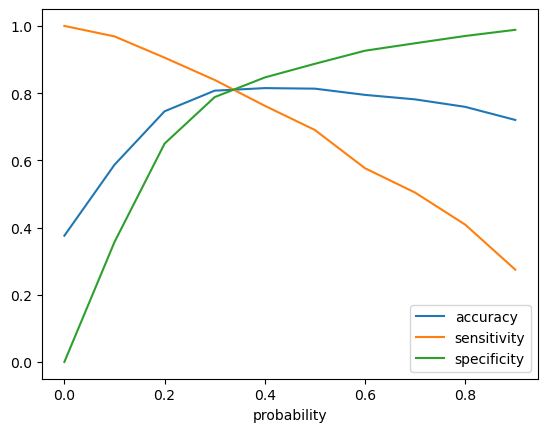

In [101]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [102]:
# 0.36 is the cut-off point

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_probability.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Conversion_probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.862986,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.052301,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.059485,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.026970,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.355373,0,1,1,1,1,0,0,0,0,0,0,0


In [104]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_probability.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.862986,1,1,1,1,1,1,1,1,1,1,0,1,86
1,0,0.052301,0,1,0,0,0,0,0,0,0,0,0,0,5
2,1,0.059485,0,1,0,0,0,0,0,0,0,0,0,0,6
3,0,0.026970,0,1,0,0,0,0,0,0,0,0,0,0,3
4,1,0.355373,0,1,1,1,1,0,0,0,0,0,0,0,36


In [105]:
# Model Evaluation

In [106]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.812778603268945

In [107]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3124,  657],
       [ 477, 1799]], dtype=int64)

In [108]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [109]:
# Sensitivity
TP / float(TP + FN)

0.7904217926186292

In [110]:
# Specificity
TN / float(TN + FP)

0.8262364453848189

In [111]:
# Precision
TP / float (TP + FP)

0.7324918566775245

In [112]:
# Recall
TP / float(TP + FN)

0.7904217926186292

In [113]:
# Predictions on the test set

In [114]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [115]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col6]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Link Clicked,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified
2629,-0.873461,True,False,False,False,False,False,False,False,False,False,True,False
390,-0.708012,False,False,False,False,False,False,False,False,False,False,True,False
325,-0.766838,False,False,False,False,False,False,False,False,False,False,True,False
4196,-0.443293,False,True,False,False,False,False,False,False,True,False,False,False
2198,0.600876,False,True,False,False,False,False,False,False,True,False,False,False


In [116]:
# Adding a const
X_test_sm = sm.add_constant(X_test.astype(float))

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2629    0.903599
390     0.123961
325     0.117017
4196    0.359091
2198    0.642004
6255    0.570001
1511    0.570843
4168    0.944080
7519    0.324255
9234    0.163480
dtype: float64

In [117]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
2629,0.903599
390,0.123961
325,0.117017
4196,0.359091
2198,0.642004


In [118]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [119]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [120]:
y_pred_final.head()

,Converted,0
2629,1,0.903599
390,0,0.123961
325,0,0.117017
4196,0,0.359091
2198,1,0.642004


In [121]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns = { 0 : 'Convertion_probability'})

In [122]:
y_pred_final['final_predicted'] = y_pred_final.Convertion_probability.map(lambda x: 1 if x > 0.36 else 0)

In [123]:
y_pred_final.head()

,Converted,Convertion_probability,final_predicted
2629,1,0.903599,1
390,0,0.123961,0
325,0,0.117017,0
4196,0,0.359091,0
2198,1,0.642004,1


In [124]:
# Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8020030816640986

In [125]:
# Confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1324,  307],
       [ 207,  758]], dtype=int64)

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
# Sensitivity
TP / float(TP + FN)

0.7904217926186292

In [128]:
# Let us calculate specificity
TN / float(TN + FP)

0.8262364453848189

In [129]:
y_pred_final['Lead_Score'] = y_pred_final.Convertion_probability.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Convertion_probability,final_predicted,Lead_Score
2629,1,0.903599,1,90
390,0,0.123961,0,12
325,0,0.117017,0,12
4196,0,0.359091,0,36
2198,1,0.642004,1,64


In [130]:
# Train Data:
# Accuracy : 81.27 %
# Sensitivity : 79.04 %
# Specificity : 82.5 %

# Test Data:
# Accuracy : 80.20 %
# Sensitivity : 79.04 %
# Specificity : 82.62 %

In [131]:
# The property for which the conversion happens

# - Last Notable Activity - Modified
# - Lead Source_Olark - Chat
# - Last Activity - Olark Chat Conversation
# - Lead Source - Direct Traffic
# - Last Activity_SMS Sent
# - Last Notable Activity_Email Opened
# - Total Time Spent on Website
# - Lead Origin_Lead Add Form
# - Last Activity_Converted to Lead
# - Do Not Email_Yes
# - Current occupation_Working Professional
# - Last Activity_Page Visited on Website
# - Last Activity_Email Link Clicked